In [7]:
from Model import ClassifierModeling
from Data import PreProcessor

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from matplotlib  import rcParams

In [12]:
data = pd.read_csv("data/bank-additional-full.csv", sep=';')
data = pd.read_csv("https://github.com/muluwork-shegaw/10Academy-week6/blob/master/data/bank-additional-full.csv?raw=true",error_bad_lines=False,sep=';')


In [13]:
outlier_col = ['age', 'campaign','cons.conf.idx']
drop_col =  ["emp.var.rate","euribor3m",'day_of_week',"duration"]
processor = PreProcessor(data,'y',drop_col,outlier_col,"pca",7)
new_data,split_result = processor.pipe_and_filter()


 ['default'] variables have dropped based on missing value ratio

 4121 missing values have been dropped

 [['emp.var.rate', 'euribor3m', 'day_of_week', 'duration']] variable has been dropped based on high correlation and less variance analysis

 before dealing with the ouliers the shape of the data (41188, 16)
after removing the outliers (36967, 16)
4221  data has been removed based on outlier analysis

['housing', 'loan', 'contact', 'y'] variables have been encoded based on label encoding the rest encoded as dummy variable

---- Scaling the data based on MinMaxScaler()

The data is reduced based on pca algorithm to 8 dimentions
Executing the reduction starts and wait ......
PCA done! Time elapsed: 530.6267449855804 seconds

spliting the data as train and test
DONE!


In [14]:
#for later use
scaled_data = new_data[0]
reduced_data =new_data[1]

X_train =split_result[0]
X_test = split_result[1]
y_train =split_result[2]
y_test = split_result[3]

In [16]:
from sklearn.model_selection import StratifiedKFold
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [17]:
classifiers =["RandomForestClassifier","LogisticRegression","DecisionTreeClassifier",
              "svm","adboost","gradienBoost"]

C:\Users\Maggie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maggie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


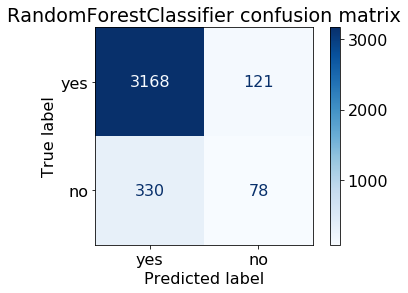

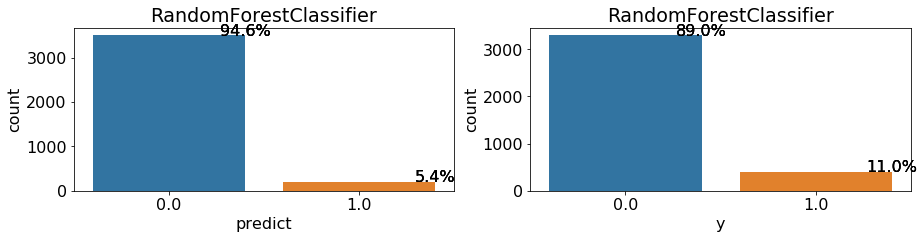

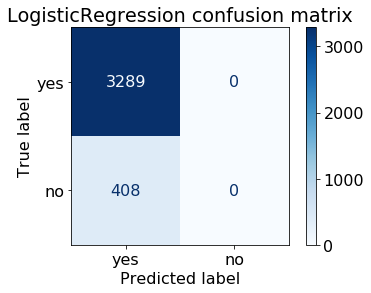

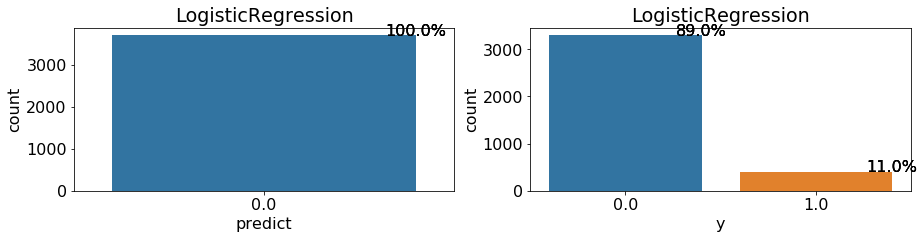

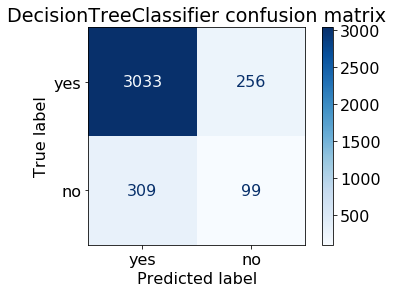

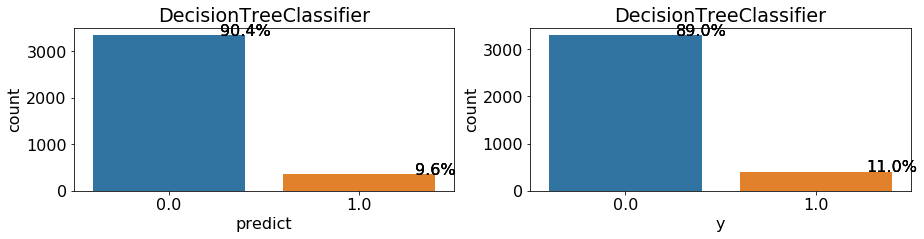

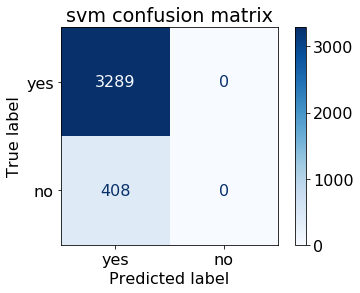

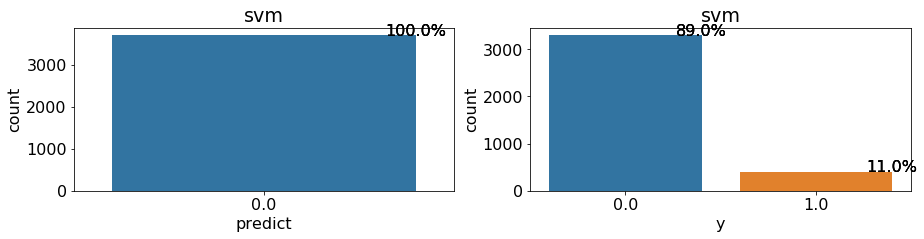

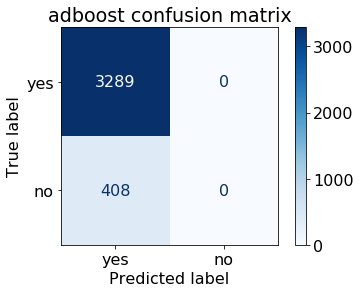

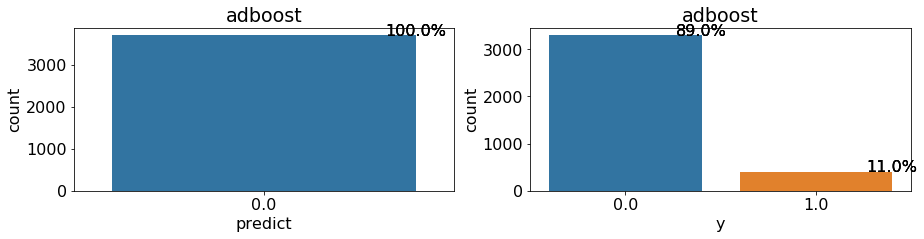

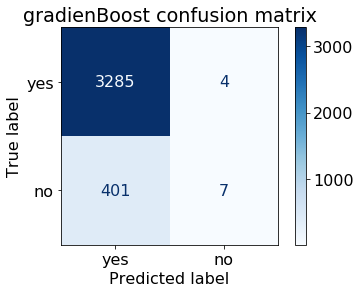

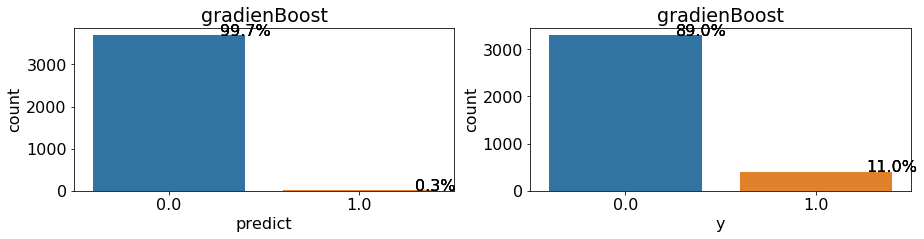

In [30]:
model =[]
eff_kfold =[]
eff =[]
mode = []
for model_classifier in classifiers:
    classifier = ClassifierModeling(model_classifier,X_train,y_train,X_test,y_test,k_fold)
    classifier.fit()
    pridict = classifier.get_predicate()
    matrix,model_fit=classifier.validate_model()
    mode.append(model_fit)
    
    eff_kfold.append(classifier.eff_model_with_kfold())
    eff.append(classifier.get_eff_model())    
    model.append(classifier.model)

In [19]:
df_kfold =pd.concat(eff_kfold)
df_kfold



,model,accuracy,neg_log_loss,r2,neg_mean_squared_error,neg_mean_absolute_error
0,RandomForestClassifier,0.870167,-0.615809,-0.325256,-0.127940,-0.129834
0,LogisticRegression,0.889640,-0.321976,-0.124050,-0.110360,-0.110360
0,DecisionTreeClassifier,0.821751,-6.158033,-0.776743,-0.174188,-0.175270
0,adboost,0.887206,-0.666020,-0.148887,-0.112794,-0.112794
0,gradienBoost,0.887206,-0.326284,-0.151631,-0.112523,-0.113605


In [20]:
df = pd.concat(eff)
df

,model,MSE,Loss,Score,Kappa,ROC_Auc,precision,recall,f1_score,accuracy
0,RandomForestClassifier,0.123343,0.351203,0.256291,0.179949,0.568919,0.373684,0.174020,0.237458,0.876657
0,LogisticRegression,0.110360,0.332204,0.124050,0.000000,0.500000,0.000000,0.000000,0.000000,0.889640
0,DecisionTreeClassifier,0.148228,0.385004,0.509753,0.195003,0.591431,0.300000,0.257353,0.277045,0.851772
0,adboost,0.110360,0.332204,0.124050,0.000000,0.500000,0.000000,0.000000,0.000000,0.889640
0,gradienBoost,0.109548,0.330981,0.115785,0.027779,0.507970,0.636364,0.017157,0.033413,0.890452


In [29]:
c= y_test
d= classifier.y_pred
a = pd.concat([c,d],axis=1)
a

,y,predict
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
3692,0.0,0.0
3693,0.0,0.0
3694,0.0,0.0
3695,0.0,0.0
